In [ ]:
import pandas as pd
import numpy as np

data = {
    "Model": ["Civic", "Corolla", "Mustang", "Model 3", "Altima", "Camry", "Accord"],
    "Make": ["Honda", "Toyota", "Ford", "Tesla", "Nissan", "Toyota", "Honda"],
    "Price": [22000, 21000, 35000, np.nan, 24000, 27000, np.nan],
    "Mileage": [30, 32, np.nan, 120, 28, 29, np.nan],
    "Year": [2020, 2019, 2021, 2022, np.nan, 2020, 2021],
    "Color": ["Blue", "Red", "Black", "White", "Gray", np.nan, "Silver"]
}

df = pd.DataFrame(data)
print(df.head())

df["Price"] = df["Price"].fillna(df["Price"].median())
df["Mileage"] = df["Mileage"].fillna(df["Mileage"].mean())
df["Year"] = df["Year"].fillna(df["Year"].mode()[0])
df["Color"] = df["Color"].fillna("Unknown")
print(df)
# df.isnull().sum()
# print("\n")
# print(df)


     Model    Make    Price  Mileage    Year  Color
0    Civic   Honda  22000.0     30.0  2020.0   Blue
1  Corolla  Toyota  21000.0     32.0  2019.0    Red
2  Mustang    Ford  35000.0      NaN  2021.0  Black
3  Model 3   Tesla      NaN    120.0  2022.0  White
4   Altima  Nissan  24000.0     28.0     NaN   Gray
     Model    Make    Price  Mileage    Year    Color
0    Civic   Honda  22000.0     30.0  2020.0     Blue
1  Corolla  Toyota  21000.0     32.0  2019.0      Red
2  Mustang    Ford  35000.0     47.8  2021.0    Black
3  Model 3   Tesla  24000.0    120.0  2022.0    White
4   Altima  Nissan  24000.0     28.0  2020.0     Gray
5    Camry  Toyota  27000.0     29.0  2020.0  Unknown
6   Accord   Honda  24000.0     47.8  2021.0   Silver


In [ ]:
df.isnull().sum()

,0
Model,0
Make,0
Price,0
Mileage,0
Year,0
Color,0


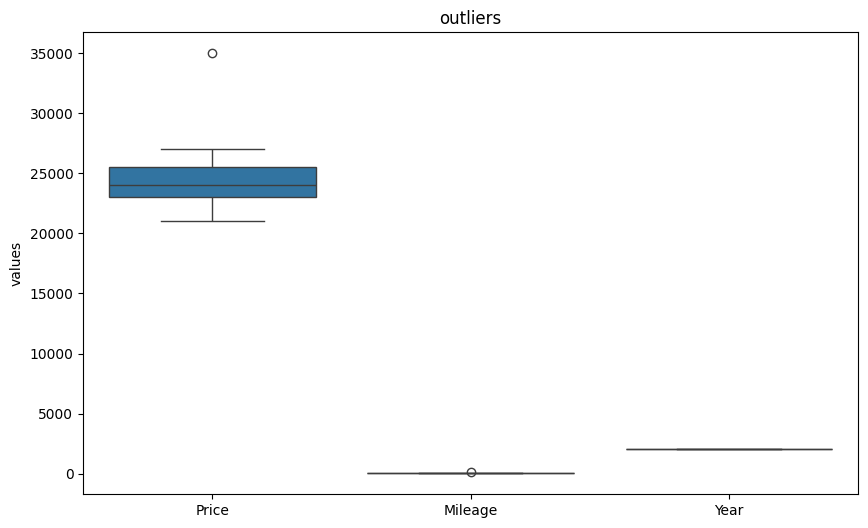

In [ ]:
import  matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,6))
sns.boxplot(data=df[['Price', 'Mileage', 'Year']])
plt.title("outliers")
plt.ylabel("values")
plt.show()

In [ ]:

from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

encoded_model = label_encoder.fit_transform(df["Model"])
encoded_df = df.copy()
encoded_df["Encoded_Model"] = encoded_model



print(encoded_df)

     Model    Make    Price  Mileage    Year    Color  Encoded_Model
0    Civic   Honda  22000.0     30.0  2020.0     Blue              3
1  Corolla  Toyota  21000.0     32.0  2019.0      Red              4
2  Mustang    Ford  35000.0     47.8  2021.0    Black              6
3  Model 3   Tesla  24000.0    120.0  2022.0    White              5
4   Altima  Nissan  24000.0     28.0  2020.0     Gray              1
5    Camry  Toyota  27000.0     29.0  2020.0  Unknown              2
6   Accord   Honda  24000.0     47.8  2021.0   Silver              0


In [ ]:
one_hot_encoded = pd.get_dummies(df[[ "Make"]])
encoded_df = df.copy()
encoded_df = pd.concat([ one_hot_encoded], axis=1)
print(encoded_df)


   Make_Ford  Make_Honda  Make_Nissan  Make_Tesla  Make_Toyota
0      False        True        False       False        False
1      False       False        False       False         True
2       True       False        False       False        False
3      False       False        False        True        False
4      False       False         True       False        False
5      False       False        False       False         True
6      False        True        False       False        False


In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
min_max_scaler = MinMaxScaler()
standard_scaler = StandardScaler()

scaled_price_mileage = min_max_scaler.fit_transform(df[['Price', 'Mileage']])
scaled_year = standard_scaler.fit_transform(df[['Year']])

scaled_data_frame = df.copy()
scaled_data_frame[['Price', 'Mileage']] = scaled_price_mileage
scaled_data_frame[['Year']] = scaled_year

print(scaled_data_frame)

     Model    Make     Price   Mileage      Year    Color
0    Civic   Honda  0.071429  0.021739 -0.474342     Blue
1  Corolla  Toyota  0.000000  0.043478 -1.581139      Red
2  Mustang    Ford  1.000000  0.215217  0.632456    Black
3  Model 3   Tesla  0.214286  1.000000  1.739253    White
4   Altima  Nissan  0.214286  0.000000 -0.474342     Gray
5    Camry  Toyota  0.428571  0.010870 -0.474342  Unknown
6   Accord   Honda  0.214286  0.215217  0.632456   Silver


In [ ]:
from sklearn.model_selection import train_test_split


X = df.drop('Price',axis =1)
y = df['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("Training Features:")
print(X_train)
print("\nTest Features:")
print(X_test)

Training Features:
     Model    Make  Mileage    Year   Color
2  Mustang    Ford     47.8  2021.0   Black
4   Altima  Nissan     28.0  2020.0    Gray
3  Model 3   Tesla    120.0  2022.0   White
6   Accord   Honda     47.8  2021.0  Silver

Test Features:
     Model    Make  Mileage    Year    Color
0    Civic   Honda     30.0  2020.0     Blue
1  Corolla  Toyota     32.0  2019.0      Red
5    Camry  Toyota     29.0  2020.0  Unknown
